In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
#importing for preprocessing the data
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
remove_terms = punctuation + '0123456789'

In [8]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in remove_terms]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    tokens = [word for word in tokens if len(word) >= 3]
    # remove remaining tokens that are not alphabetic
    tokens = [word.lower() for word in tokens if word.isalpha()]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]    
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [6]:
corpus = open("History_of_Astronomy.txt", encoding="utf8").readlines()

In [9]:
corpus = [preprocessing(sentence) for sentence in corpus if sentence.strip() !='']
corpus

['project gutenberg ebook history astronomy george forbes',
 'title history astronomy',
 'author george forbes',
 'illustration sir isaac newton from bust roubiliac trinity',
 'college cambridge',
 'history astronomy',
 'george forbes',
 'inst',
 'formerly professor natural philosophy anderson college glasgow',
 'author the transit venus rendu theory the glacier',
 'savoy etc',
 'content',
 'preface',
 'book the geometrical period',
 'primitive astronomy and astrology',
 'ancient astronomy chinese and chaldæans',
 'ancient greek astronomy',
 'the reign epicycle from ptolemy copernicus',
 'book the dynamical period',
 'discovery the true solar system tycho brahe kepler',
 'galileo and the telescope notion gravity horrocks etc',
 'sir isaac newton law universal gravitation',
 'newton successor halley euler lagrange laplace etc',
 'discovery new planet herschel piazzi adam and',
 'verrier',
 'book iii observation',
 'instrument precision size the solar system',
 'history the telescope spe

In [10]:
tokenizer = Tokenizer()

In [11]:
tokenizer.fit_on_texts(corpus)

In [12]:
X_train_tokens = tokenizer.texts_to_sequences(corpus)

In [15]:
word2id = tokenizer.word_index
id2word = dict([(value, key) for (key, value) in word2id.items()])
id2word

{1: 'the',
 2: 'star',
 3: 'sun',
 4: 'motion',
 5: 'planet',
 6: 'observation',
 7: 'earth',
 8: 'one',
 9: 'found',
 10: 'year',
 11: 'great',
 12: 'time',
 13: 'moon',
 14: 'line',
 15: 'orbit',
 16: 'made',
 17: 'theory',
 18: 'first',
 19: 'solar',
 20: 'comet',
 21: 'astronomy',
 22: 'also',
 23: 'astronomer',
 24: 'system',
 25: 'law',
 26: 'new',
 27: 'discovery',
 28: 'this',
 29: 'distance',
 30: 'period',
 31: 'but',
 32: 'newton',
 33: 'work',
 34: 'spectrum',
 35: 'telescope',
 36: 'many',
 37: 'day',
 38: 'part',
 39: 'light',
 40: 'kepler',
 41: 'position',
 42: 'would',
 43: 'may',
 44: 'instrument',
 45: 'must',
 46: 'two',
 47: 'used',
 48: 'could',
 49: 'fact',
 50: 'tycho',
 51: 'upon',
 52: 'date',
 53: 'much',
 54: 'book',
 55: 'century',
 56: 'discovered',
 57: 'eclipse',
 58: 'like',
 59: 'satellite',
 60: 'herschel',
 61: 'point',
 62: 'jupiter',
 63: 'copernicus',
 64: 'spot',
 65: 'body',
 66: 'mean',
 67: 'fixed',
 68: 'observatory',
 69: 'sir',
 70: 'seen',

In [16]:
vocab_size = len(word2id) + 1
vocab_size

4254

In [17]:
embed_size = 300
window_size = 2

In [18]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []
            start = index - window_size
            end = index + window_size + 1
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)
            x = pad_sequences(context_words, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)

In [19]:
i = 0
for x, y in generate_context_word_pairs(corpus=X_train_tokens, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X ):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X ): ['project', 'gutenberg', 'history', 'astronomy'] -> Target (Y): ebook
Context (X ): ['gutenberg', 'ebook', 'astronomy', 'george'] -> Target (Y): history
Context (X ): ['ebook', 'history', 'george', 'forbes'] -> Target (Y): astronomy
Context (X ): ['illustration', 'sir', 'newton', 'from'] -> Target (Y): isaac
Context (X ): ['sir', 'isaac', 'from', 'bust'] -> Target (Y): newton
Context (X ): ['isaac', 'newton', 'bust', 'roubiliac'] -> Target (Y): from
Context (X ): ['newton', 'from', 'roubiliac', 'trinity'] -> Target (Y): bust
Context (X ): ['formerly', 'professor', 'philosophy', 'anderson'] -> Target (Y): natural
Context (X ): ['professor', 'natural', 'anderson', 'college'] -> Target (Y): philosophy
Context (X ): ['natural', 'philosophy', 'college', 'glasgow'] -> Target (Y): anderson
Context (X ): ['author', 'the', 'venus', 'rendu'] -> Target (Y): transit


In [20]:
#create model
model = Sequential()

In [21]:
model.add(Embedding(input_dim=vocab_size,
                   output_dim=embed_size,
                   input_length=window_size*2,
                   embeddings_initializer='glorot_uniform'))

In [22]:
from tensorflow.keras.backend import mean
model.add(Lambda(lambda x: mean(x, axis=1), output_shape=(embed_size,)))

In [23]:
model.add(Dense(vocab_size, activation='softmax', kernel_initializer='glorot_uniform'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 300)            1276200   
_________________________________________________________________
lambda (Lambda)              (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 4254)              1280454   
Total params: 2,556,654
Trainable params: 2,556,654
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [26]:
%%time
n_epochs = 10
for epoch in range(n_epochs):
    loss = 0.
    for x, y in generate_context_word_pairs(corpus=X_train_tokens, window_size=window_size, vocab_size=vocab_size):
        loss += model.train_on_batch(x, y)

    print('Epoch:', epoch, '\tLoss:', loss)

Epoch: 0 	Loss: 165953.9457566589
Epoch: 1 	Loss: 146767.23108801246
Epoch: 2 	Loss: 127579.75490574539
Epoch: 3 	Loss: 107746.92946165986
Epoch: 4 	Loss: 89741.1429290534
Epoch: 5 	Loss: 74729.98368238797
Epoch: 6 	Loss: 62743.660398488515
Epoch: 7 	Loss: 53380.26918450388
Epoch: 8 	Loss: 46173.14491868089
Epoch: 9 	Loss: 40631.7599557995
Wall time: 1h 54min 15s


In [27]:
weights = model.get_weights()[0]
weights = weights[1:]
print(weights.shape)

(4253, 300)


In [28]:
pd.DataFrame(weights, index=list(id2word.values())).head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
the,0.010582,-0.171962,-0.102543,0.684172,-0.051922,0.093549,-0.454354,0.428081,0.042072,-0.856755,1.097009,0.110390,-0.423187,-0.473263,-0.074017,-0.719856,-0.609981,-0.038357,-0.909964,0.283228,0.160551,-0.381874,-0.130142,0.149909,0.131280,0.110507,-1.470012,0.231631,0.124709,-0.976686,-0.149141,-0.071204,0.082866,-0.168370,0.406469,...,-0.716068,0.071456,-0.119366,0.238890,-0.201881,0.430962,-0.021086,-0.248917,-0.028335,0.052297,0.403134,0.034139,-0.030974,-0.243999,0.313886,-0.601556,0.020742,0.026700,0.187644,0.200112,0.505063,0.696938,0.002264,-0.417898,-0.196358,2.250097,0.014113,-0.292611,0.239436,0.093972,0.133305,0.023933,-0.130726,-0.016774,-0.276508
star,0.690095,0.533099,-0.071480,-0.173890,-0.452313,-0.049259,-0.097757,0.209202,0.221815,-0.314354,-0.495086,-0.618706,-0.987118,0.294668,0.373743,0.029624,0.019650,-0.026754,-0.176396,0.495901,0.351243,-0.295445,0.231005,0.049183,0.297561,-0.275668,0.113206,-0.004150,0.037085,0.757754,-0.307520,0.188288,-0.081937,-0.294721,-0.292809,...,1.135516,-0.283004,-0.242907,-0.472344,-0.316117,0.178722,-0.552565,-0.248435,0.759309,0.156115,0.107295,0.178160,-0.176900,0.146619,-0.132285,-0.732979,0.035369,0.039609,0.898615,0.398620,0.258583,-0.434598,1.214384,-0.537638,-0.101567,0.338903,0.329122,0.364676,0.332982,-2.916639,0.476786,-0.417884,-0.304902,0.730896,-0.552205
sun,0.148850,0.162811,-0.289216,-0.081450,-1.561206,0.279388,0.142188,-0.012155,0.307523,-0.302669,0.773410,-0.189430,0.230052,-0.049312,0.474642,-0.056659,-0.126186,-0.642232,-0.426503,-0.350394,-0.249492,0.232271,0.534033,0.611177,0.410340,0.531253,0.096887,0.429677,0.132260,0.010765,-0.175593,-0.470866,-0.055674,-0.280623,-0.063118,...,-0.201482,0.047376,1.917062,-0.534792,0.046807,-0.556687,-0.001877,0.204420,-0.231993,-0.461607,0.548849,-0.325008,0.314532,-0.831162,0.331920,0.031926,0.087483,-0.176620,0.590279,0.111350,1.388758,-0.514175,-0.308540,-0.024581,-0.294051,0.041709,0.381492,0.253168,0.210645,0.119519,0.569515,-0.587031,1.144609,-0.364675,0.014383
motion,-0.181482,-0.053549,-0.070023,1.653314,0.981984,-1.588740,0.354041,-0.109679,0.125850,0.129027,-0.856763,-0.289876,0.058763,0.815929,-0.550372,-0.396339,0.356953,0.079508,-0.349582,-0.284884,0.143659,0.096764,0.561928,-0.199385,-0.164033,-1.183428,-0.296902,-0.087833,0.041725,-0.384279,0.183917,0.415724,0.247892,-0.238586,0.130605,...,0.011723,-1.108354,0.481194,-0.552203,0.011075,-0.103226,0.039732,-0.193701,-0.422288,-0.229509,-0.099023,-0.480437,0.348847,0.623441,-0.245685,-0.056551,-0.522342,-0.109375,0.411269,0.334365,-0.461797,-0.170278,-0.413820,0.428527,-1.478499,1.367113,0.027499,0.024632,-2.009109,0.079843,0.156192,-0.150518,0.495169,-0.519212,0.311608
planet,0.508712,0.013976,-0.957427,-0.181980,0.554214,-0.409614,-0.359425,-0.706236,-0.272797,0.042781,0.934343,-0.042754,-0.536375,0.851143,0.505397,0.594845,0.638886,0.277174,0.489467,-0.772629,0.447293,0.251385,-0.162702,-0.605032,0.117692,-0.114637,0.008852,-0.571992,0.402177,-0.311974,0.879368,0.330501,0.314731,0.330602,0.936181,...,0.224349,-0.797797,-1.220477,0.898047,0.305357,-0.520146,-0.648292,-0.009824,-2.486215,-0.681716,0.273741,-0.477494,0.801118,-0.069237,0.144712,1.680017,0.186651,-0.115257,0.116853,0.022713,-0.440795,-0.116945,-0.207657,-0.085565,-0.000233,-0.631257,-0.795498,-0.053841,-0.046821,0.080426,0.150519,1.439143,-0.610886,-0.114994,-0.354566
observation,0.488181,1.888373,-0.650128,-0.178940,-0.348583,0.248818,1.021237,-0.291761,-0.442491,-0.413002,2.083280,-0.390780,-0.600715,0.317344,-2.237845,-0.574501,0.066760,-0.685288,-0.092820,0.215877,-0.459756,0.004269,-0.110659,0.292333,0.177994,-0.207562,0.500994,0.711527,-0.031192,-0.346362,-0.119833,-0.210550,0.045204,0.819425,0.264702,...,-0.281214,0.218325,-0.439864,-0.497620,

In [29]:
distance_matrix = cosine_similarity(weights)
print(distance_matrix.shape)

(4253, 4253)


In [30]:
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['copernicus', 'system', 'sun', 'halley', 'kepler','discovery','ancient']}
similar_words

{'copernicus': ['ocean', 'radiant', 'average', 'noteworthy', 'repeatedly'],
 'system': ['erroneous',
  'independent',
  'substitute',
  'originated',
  'reduction'],
 'sun': ['physically', 'intrinsic', 'triangle', 'done', 'defended'],
 'halley': ['diffuse', 'deriving', 'gould', 'evolution', 'johannes'],
 'kepler': ['threefold', 'immediately', 'untested', 'alexandria', 'recall'],
 'discovery': ['readily',
  'controller',
  'abolish',
  'automatically',
  'intolerable'],
 'ancient': ['obvious', 'trigonometrical', 'doled', 'every', 'evolve']}

In [31]:
words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

Total words: 42 	Word Embedding shapes: (42, 300)


In [32]:
tsne = TSNE(n_components=2, random_state=2018, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

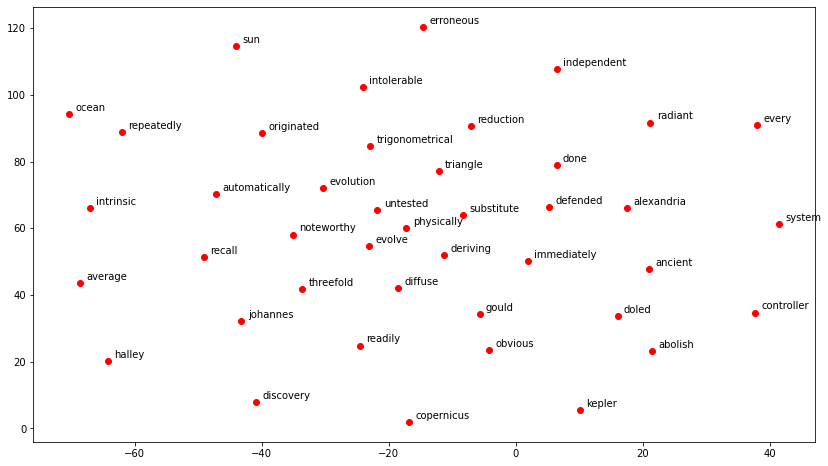

In [34]:
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='red')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')